In [1]:
# import...

# helper modules
import os
import warnings
os.chdir("/Users/etmu9498/research/code/scripts")
import helper_fns

# computing modules
import xarray as xr
import numpy as np
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import shapely.geometry as sgeom

os.chdir("/Users/etmu9498/research/code/scripts")
import make_plots

# metadata
import tc_metadata

In [2]:
# code was taken from Flight Patterns Sam.ipynb in 06-22-22-code-dir-clone
# and Dropsonde Script Tests.ipynb and Dropsonde Temperature Comparison.ipynb in code-older/04-20-22

# search "frd dropsonde" and click on the aoml link when their site is working again! any explanations?

In [3]:
# cell testing: can zhien's datasets be read automatically by xarray?
# it doesn't seem so... :(

# sonde_path_zhien = "/Users/etmu9498/Desktop/research/dropsondes/zhien-data"
# sonde = xr.open_dataset( "D20210929_224536QC.FRD")
# sonde

In [2]:
# load data for all following plots

# loading dropsondes
sonde_path_0926 = "/Users/etmu9498/research/data/dropsondes/noaa-data/20210926H1_NETCDF"
sonde_path_0927 = "/Users/etmu9498/research/data/dropsondes/noaa-data/20210927H1_NETCDF"
sonde_path_0929 = "/Users/etmu9498/research/data/dropsondes/noaa-data/20210929H2_NETCDF"
sonde_path_0930 = "/Users/etmu9498/research/data/dropsondes/noaa-data/20210930H1_NETCDF"

# choose sondes / passes of interest: choose second date to get sondes at 0 to 2 UTC+1
sonde_path1 = sonde_path_0929
sonde_path2 = sonde_path_0930
sonde_list1 = make_plots.load_sondes( sonde_path1, print_files=False)
sonde_list2 = make_plots.load_sondes( sonde_path2, print_files=False)
dataset = 5
date = '09-29'

# loading crl data for flight path
metadata = tc_metadata.all_data()
crl_path = metadata["crl_path"]
crl_list = make_plots.load_crl( crl_path, print_files=False)
crl_name = tc_metadata.choose_crl_date( date, crl_list)

# extent for dropsonde plot
extent = [-53, -48.5, 12.5, 17.5] # sam 9/26 zoom out
# extent = [-51.5, -50, 14, 15] # sam 9/26 zoom in

extent = [-60.5, -55.5, 18, 22.5] # sam 9/29 zoom out

In [5]:
# check out flight level field resolution

fl_path = "/Users/etmu9498/research/data/in-situ-nc/"
os.chdir( fl_path)
data = xr.open_dataset( "20210929H2_iwg1.nc")

time_secs = ( ( data.time[-1] - data.time[0] ) / len( data.time) ) * 60 * 60
# print( time_secs)

data

<xarray.Dataset>
Dimensions:          (index: 31192, time: 31192)
Coordinates:
  * index            (index) int64 4 5 6 7 8 9 ... 32230 32231 32232 32233 32234
  * time             (time) float64 17.83 17.83 17.83 ... 26.51 26.51 26.51
Data variables: (12/13)
    TIME             (index) object ...
    WS.d             (index) float64 ...
    WD.d             (index) float64 ...
    UWZ.d            (index) float64 ...
    ASfmrRainRate.1  (index) float64 ...
    LATref           (index) float64 ...
    ...               ...
    TAS.d            (index) float64 ...
    HT.d             (index) float64 ...
    PITCHref         (index) float64 ...
    ROLLref          (index) float64 ...
    dt               (index) datetime64[ns] ...
    str_time         (index) object ...

In [3]:
# the cell below shows that there's no sonde data at any altitude :/

# check out fields saved in dropsonde data!
os.chdir( sonde_path1)
sondeset = -4
sonde_data = xr.open_dataset( sonde_list1[ sondeset])

print( sonde_list1[ sondeset])

# dry bulb temperature == normal temperature! virtual temperature is already nicely calculated for us too :)

# print( sonde_data.time[0:30].values)
# print( sonde_data.gpsalt[0:30].values)
# print( len( np.where( np.all( [np.isnan( sonde_data.gpsalt)] ))))
# print( sonde_data.w_wind[-250:-200].values)

# print( sonde_data.time[0].values)
# print( type( sonde_data.time[0].values))

print( np.nanmax( sonde_data.time))
print( np.nanmin( sonde_data.time))

# print all time values
np.set_printoptions(threshold=np.inf)

print( sonde_data['gpsalt'].values)
np.set_printoptions(threshold=1000)

print( len( sonde_data.dz))
print( len( sonde_data.time))

sonde_data

D20210929_231706QCQC.nc
2021-09-29T23:22:12.540008544
2021-09-29T23:17:06.000000000
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan

<xarray.Dataset>
Dimensions:         (time: 1226, obs: 1)
Coordinates:
  * time            (time) datetime64[ns] 2021-09-29T23:22:12.540008544 ... 2...
    lat             (time) float32 ...
    lon             (time) float32 ...
    gpsalt          (time) float32 nan nan nan nan nan ... nan nan nan nan nan
Dimensions without coordinates: obs
Data variables: (12/27)
    trajectory      |S1 ...
    launch_time     datetime64[ns] ...
    pres            (time) float32 ...
    tdry            (time) float32 ...
    dp              (time) float32 ...
    rh              (time) float32 ...
    ...              ...
    reference_rh    (obs) float32 ...
    reference_wspd  (obs) float32 ...
    reference_wdir  (obs) float32 ...
    reference_lat   (obs) float32 ...
    reference_lon   (obs) float32 ...
    reference_alt   (obs) float32 ...
Attributes: (12/16)
    Conventions:          CF-1.6
    RepoRevision:         V3.4.6
    RepoLastChangedDate:  Fri Apr 30 16:17:27 2021 -0600
    RepoId:               163b1128fa837a96c93dfe8a59c915ff3185b748
    RepoBranch:           master
    featureType:          trajectory
    ...                   ...
    PlatformType:         P-3
    ProcessingTime:       02 Feb 2022 23:08 UTC
    Project:              
    QCDisclaimer:         
    SondeId:              210540655
    SoundingDescription:  D20210929_231706QC.frd P-3, NOAA42

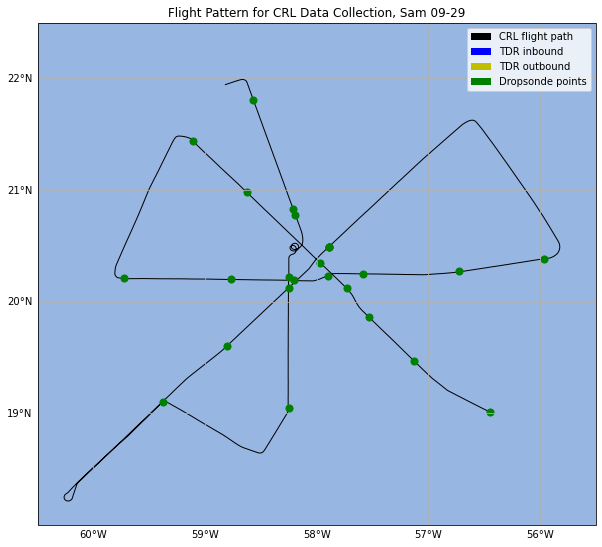

In [57]:
# plot spatial distribution of dropsondes: 

fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent( extent, crs=ccrs.PlateCarree())

gl = ax.gridlines( draw_labels=True) #, color="k")
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)
lat = crl_data.Lat
lon = crl_data.Lon

track = sgeom.LineString(zip(lon, lat))
ax.add_geometries([track], ccrs.PlateCarree(),
                  facecolor='none', edgecolor='k', zorder=0)


os.chdir( sonde_path1)
for i in range( len( sonde_list1)):
    sonde = xr.open_dataset( sonde_list1[ i])
    ax.scatter( sonde.reference_lon, sonde.reference_lat, s=50, c='g', edgecolor='g', zorder=1)

# repeat for wraparound data
os.chdir( sonde_path2)
for i in range( len( sonde_list2)):
    sonde = xr.open_dataset( sonde_list2[i])
    ax.scatter( sonde.reference_lon, sonde.reference_lat, s=50, c='g', edgecolor='g', zorder=1)


line = mpatches.Rectangle((0, 0), 1, 1, facecolor="k")
line2 = mpatches.Rectangle((0, 0), 1, 1, facecolor="b")
line3 = mpatches.Rectangle((0, 0), 1, 1, facecolor="y")
dots = mpatches.Circle((10, 5), radius=5, facecolor="g")
labels = ['CRL flight path', 'TDR inbound', 'TDR outbound', 'Dropsonde points']
ax.legend([line, line2, line3, dots], labels)

ax.set_title( "Flight Pattern for CRL Data Collection, Sam " + date)
ax.set_xlabel( "Longitude (Degrees)")
ax.set_ylabel( "Latitude (Degrees)")
plt.show()

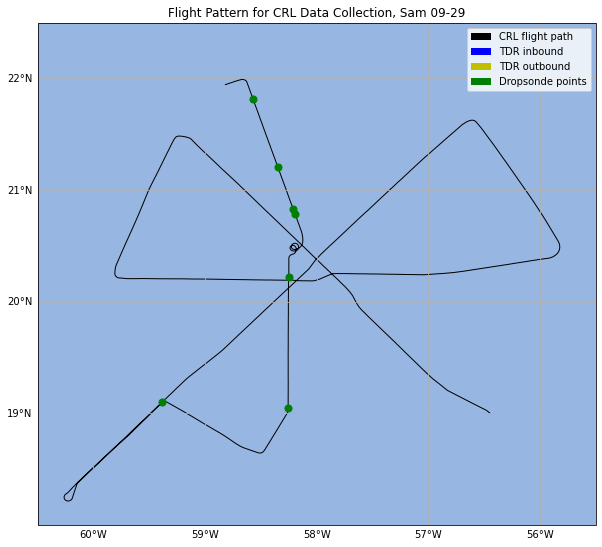

In [17]:
# repeat above but with zhien's data! 

fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent( extent, crs=ccrs.PlateCarree())

gl = ax.gridlines( draw_labels=True) #, color="k")
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)
lat = crl_data.Lat
lon = crl_data.Lon

track = sgeom.LineString(zip(lon, lat))
ax.add_geometries([track], ccrs.PlateCarree(),
                  facecolor='none', edgecolor='k', zorder=0)


col_names = [ 'IX', 't (s)', 'P (mb)', 'T (C)', 'RH (%)', 'Z (m)', 'WD', 'WS (m/s)', 'U (m/s)', 'V (m/s)', 'NS', 
          'WZ (m/s)', 'ZW (m)', 'FP', 'FT', 'FH', 'FW', 'LAT (N)', 'LON (E)' ]
new_path = "/Users/etmu9498/research/data/dropsondes/bl-final-project/"
new_list = make_plots.load_sondes( new_path, print_files=False)

for i in range( 20, 27): # (7, 14) len( new_list)):
    df = pd.read_fwf(new_path+new_list[i], skiprows=21, names=col_names)
    df['LAT (N)'].replace(-999.000, np.nan,inplace=True)
    df['LON (E)'].replace(-999.000, np.nan,inplace=True)
    df = df.dropna(subset=('LAT (N)', 'LON (E)'), how='any').reset_index(drop=True)
    ax.scatter( df[ 'LON (E)'][0], df['LAT (N)'][0], s=50, c='g', edgecolor='g', zorder=1)

    
line = mpatches.Rectangle((0, 0), 1, 1, facecolor="k")
line2 = mpatches.Rectangle((0, 0), 1, 1, facecolor="b")
line3 = mpatches.Rectangle((0, 0), 1, 1, facecolor="y")
dots = mpatches.Circle((10, 5), radius=5, facecolor="g")
labels = ['CRL flight path', 'TDR inbound', 'TDR outbound', 'Dropsonde points']
ax.legend([line, line2, line3, dots], labels)

ax.set_title( "Flight Pattern for CRL Data Collection, Sam " + date)
ax.set_xlabel( "Longitude (Degrees)")
ax.set_ylabel( "Latitude (Degrees)")
plt.show()

In [85]:
def plot_sonde_wv_etc(sonde_path, sonde_list, variable ='mr'):
    warnings.filterwarnings("ignore")

    os.chdir( sonde_path)
    for ind in range( len( sonde_list)):
        sonde = xr.open_dataset( sonde_list[ ind])
        # look at the initial time for each sonde
        # do some horrible conversions to get result into a float, there's probably a better solution
        start_string_time = sonde.time[0].values.astype(str)[11:22]
        start_time = float( start_string_time[0:2]) + float( start_string_time[3:5]) / 60 + float( start_string_time[6:8]) / 3600
        end_string_time = sonde.time[-1].values.astype(str)[11:22]
        end_time = float( end_string_time[0:2]) + float( end_string_time[3:5]) / 60 + float( end_string_time[6:8]) / 3600
        mid_time = ( start_time + end_time ) / 2

        if mid_time < 3.0:
            mid_time = mid_time + 24

        # get wvmr
        Z = sonde[ variable].values[~np.isnan( sonde[ variable].values)]
        heights = np.linspace( np.nanmin( -crl_data.H.values), np.nanmax( -crl_data.H.values), len( Z))

        # plot line representing wvmr!
        if variable == 'mr':
            plt.pcolormesh( np.array( [mid_time - .00125, mid_time + .00125]), heights, np.array( [Z, Z] ).transpose(),
                           vmin = 0, vmax =20 )
        elif variable == 'tdry':
            color_map = plt.cm.get_cmap( "RdYlBu").reversed()
            plt.pcolormesh( np.array( [mid_time - .00125, mid_time + .00125]), heights, np.array( [Z, Z] ).transpose(),
                           vmin = 5, vmax =35, cmap=color_map )
            
        else:
            print( variable + " hasn't yet been added to plot_sonde_wv_etc() ! ")
            
        warnings.filterwarnings("default")

In [66]:
def plot_sonde_location(sonde_path, sonde_list):
    
    os.chdir( sonde_path)
    for ind in range( len( sonde_list)):
        sonde = xr.open_dataset( sonde_list[ ind])
        # look at the initial time for each sonde
        # do some horrible conversions to get result into a float, there's probably a better solution
        start_string_time = sonde.time[0].values.astype(str)[11:22]
        start_time = float( start_string_time[0:2]) + float( start_string_time[3:5]) / 60 + float( start_string_time[6:8]) / 3600
        end_string_time = sonde.time[-1].values.astype(str)[11:22]
        end_time = float( end_string_time[0:2]) + float( end_string_time[3:5]) / 60 + float( end_string_time[6:8]) / 3600
        mid_time = ( start_time + end_time ) / 2

        if mid_time < 3.0:
            mid_time = mid_time + 24

        # plot sonde location
        plt.axvline( x=mid_time, c='r', linewidth=2)

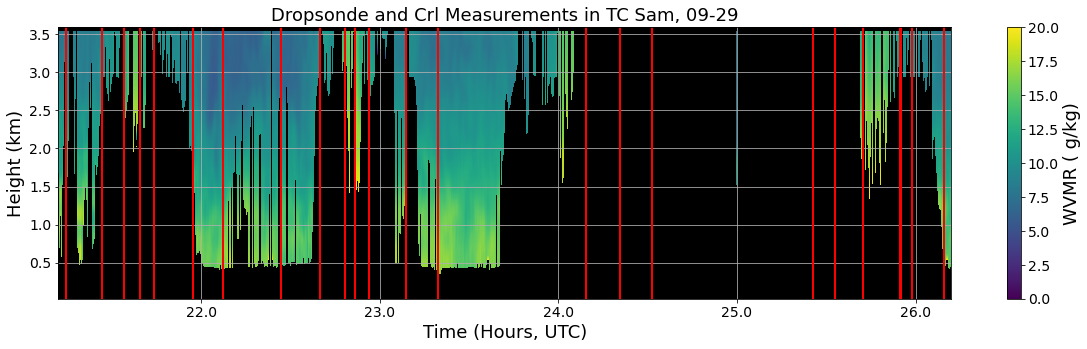

In [67]:
# plot sonde location data atop crl data... how do they match up??

plt.figure(figsize=(20, 5))
helper_fns.change_font_sizes()

# plot crl data
os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)
make_plots.plot_wvmr( crl_path, crl_name, 0, len( crl_data.time) - 1, 'time')
plt.xlabel("Time (Hours, UTC)")
plt.title("Dropsonde and Crl Measurements in TC Sam, " + date, fontsize=18)


# plot each dropsonde profile!
plot_sonde_location( sonde_path1, sonde_list1)
plot_sonde_location( sonde_path2, sonde_list2)

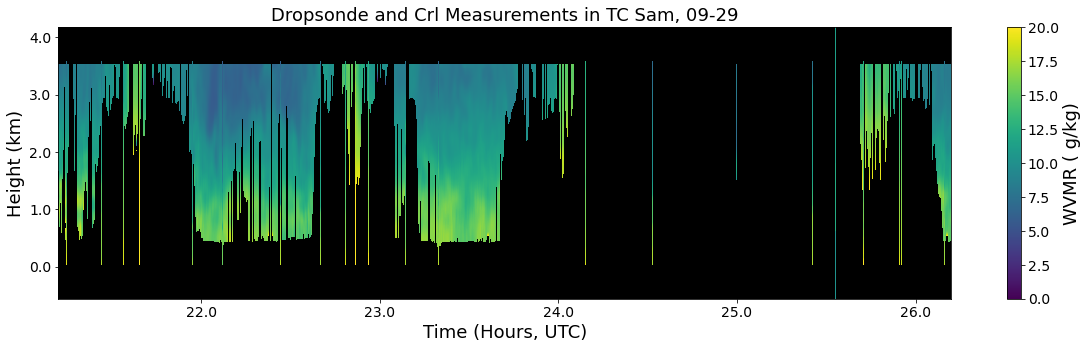

In [81]:
# plot wvmr data atop crl data... how do they match up??

plt.figure(figsize=(20, 5))
helper_fns.change_font_sizes()

# plot crl data
os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)
make_plots.plot_wvmr( crl_path, crl_name, 0, len( crl_data.time) - 1, 'time')
plt.xlabel("Time (Hours, UTC)")
plt.title("Dropsonde and Crl Measurements in TC Sam, " + date, fontsize=18)


# plot each dropsonde profile!
plot_sonde_wv_etc( sonde_path1, sonde_list1)
plot_sonde_wv_etc( sonde_path2, sonde_list2)

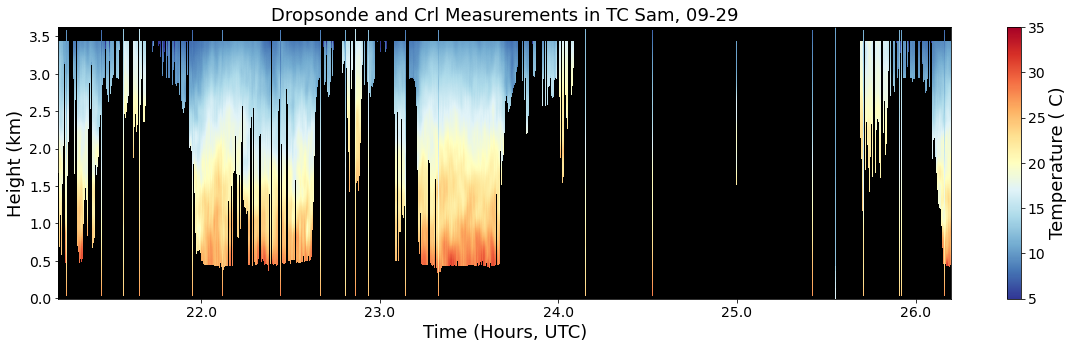

In [86]:
# plot temperature data atop crl data... how do they match up??

plt.figure(figsize=(20, 5))
helper_fns.change_font_sizes()

# plot crl data
os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)
make_plots.plot_T( crl_path, crl_name, 0, len( crl_data.time) - 1, 'time')
plt.xlabel("Time (Hours, UTC)")
plt.title("Dropsonde and Crl Measurements in TC Sam, " + date, fontsize=18)


# plot each dropsonde profile!
plot_sonde_wv_etc( sonde_path1, sonde_list1, variable='tdry')
plot_sonde_wv_etc( sonde_path2, sonde_list2, variable='tdry')

Water Vapor
height at t = 21.24: 3111.78
height at t = 21.44: 3027.8
height at t = 21.56: 2731.81
height at t = 21.65: 2613.19
height at t = 21.73: 2901.9
height at t = 21.95: 3111.08
height at t = 22.12: 3143.99
height at t = 22.44: 3124.29
height at t = 22.66: 3028.56
height at t = 22.80: 2612.88
height at t = 22.86: 2636.62
height at t = 22.93: 2939.85
height at t = 23.14: 3108.64
height at t = 23.32: 3146.93
height at t = 17.83: 109.59
height at t = 17.83: 109.59
height at t = 17.83: 109.59





Potential Temp
height at t = 21.24: 3111.78
height at t = 21.44: 3027.8
height at t = 21.56: 2731.81
height at t = 21.65: 2613.19
height at t = 21.73: 2901.9
height at t = 21.95: 3111.08
height at t = 22.12: 3143.99
height at t = 22.44: 3124.29
height at t = 22.66: 3028.56
height at t = 22.80: 2612.88
height at t = 22.86: 2636.62
height at t = 22.93: 2939.85
height at t = 23.14: 3108.64
height at t = 23.32: 3146.93
height at t = 17.83: 109.59
height at t = 17.83: 109.59
height at t = 17.83:

Text(0.5, 0, 'Virtual Potential Temperature (C)')

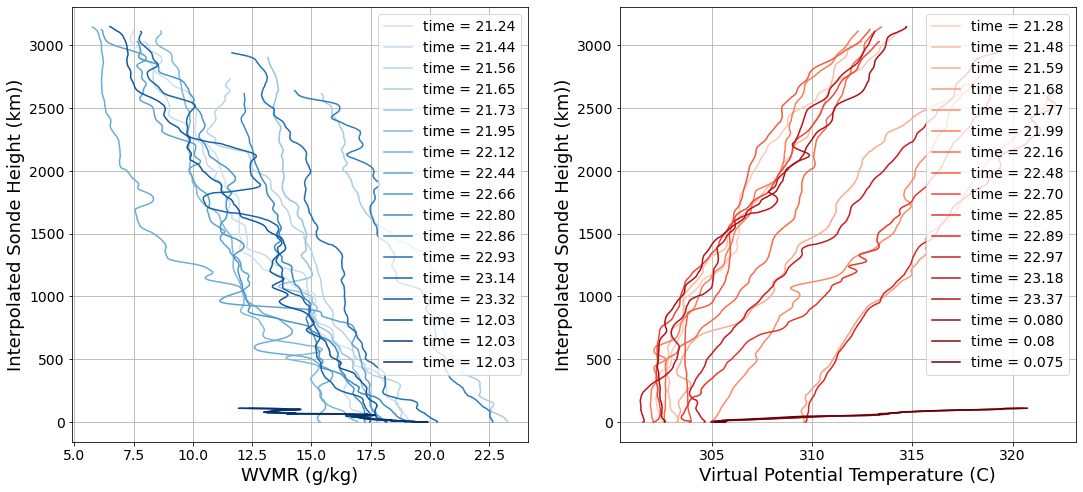

In [86]:
# use dropsonde height interpolation to get an initial idea of temperature and water vapor profile distributions

fl_path = "/Users/etmu9498/research/data/in-situ-nc/"
os.chdir( fl_path)
fl_data = xr.open_dataset( "20210929H2_iwg1.nc")


# make figure before loop
plt.figure( figsize=(18, 8))

helper_fns.change_font_sizes()


##################
# subplot 1: wvmr
##################
print( "Water Vapor")
plt.subplot(121)

# choose color gradient!
# old: colors = plt.cm.YlGn( np.linspace(.2,1,13)) 
colors = plt.cm.Blues( np.linspace(.2,1, len(sonde_list1))) 

# create a line for every sonde
os.chdir( sonde_path1)
for ind in range( len( sonde_list1)):
    sonde = xr.open_dataset( sonde_list1[ ind])
    # look at the initial time for each sonde
    # do some horrible conversions to get result into a float, there's probably a better solution
    start_string_time = sonde.time[0].values.astype(str)[11:22]
    start_time = float( start_string_time[0:2]) + float( start_string_time[3:5]) / 60 + float( start_string_time[6:8]) / 3600
    end_string_time = sonde.time[-1].values.astype(str)[11:22]
    end_time = float( end_string_time[0:2]) + float( end_string_time[3:5]) / 60 + float( end_string_time[6:8]) / 3600
    # the final time used for plotting
    mid_time = ( start_time + end_time ) / 2

    # print( mid_time)
    # print( type( mid_time))

    # get P-3 height for that timestep
    idx1 = (np.abs(fl_data.time - mid_time )).argmin().values
    p3_height = fl_data['HT.d'][idx1].values
    
    print( "height at t = " + str( fl_data.time[ idx1].values)[0:5] + ": " + str( p3_height))

    # get rid of nans, interpolate a y axis, and plot things!
    mr_nonan = sonde.mr.values[~np.isnan( sonde.mr.values)]
    mr_heights = np.linspace( 0.0, p3_height, len( mr_nonan))

    labels = "time = " + str( mid_time )[0:5]
    plt.plot( mr_nonan, mr_heights, label=labels, color = colors[ ind] ) 

plt.grid('on')
plt.legend()
plt.ylabel( "Interpolated Sonde Height (km))")
plt.xlabel( "WVMR (g/kg)")






print( "\n\n\n\n")
print("Potential Temp")


#########################################
# subplot 2: potential temperature
################################################
plt.subplot(122)


# choose color gradient!
# old: colors = plt.cm.YlGn( np.linspace(.2,1,13)) 
colors = plt.cm.Reds( np.linspace(.2,1, len(sonde_list1))) 


# create a line for every sonde

os.chdir( sonde_path1)
for ind in range( len( sonde_list1)):
    sonde = xr.open_dataset( sonde_list1[ ind])
    # look at the initial time for each sonde
    # do some horrible conversions to get result into a float, there's probably a better solution
    start_string_time = sonde.time[0].values.astype(str)[11:22]
    start_time = float( start_string_time[0:2]) + float( start_string_time[3:5]) / 60 + float( start_string_time[6:8]) / 3600
    end_string_time = sonde.time[-1].values.astype(str)[11:22]
    end_time = float( end_string_time[0:2]) + float( end_string_time[3:5]) / 60 + float( end_string_time[6:8]) / 3600
    # the final time used for plotting
    mid_time = ( start_time + end_time ) / 2

    # print( mid_time)
    # print( type( mid_time))

    # get P-3 height for that timestep
    idx1 = (np.abs(fl_data.time - mid_time )).argmin().values
    p3_height = fl_data['HT.d'][idx1].values
    
    print( "height at t = " + str( fl_data.time[ idx1].values)[0:5] + ": " + str( p3_height))

    # get rid of nans, interpolate a y axis, and plot things!
    theta_nonan = sonde.theta_v.values[~np.isnan( sonde.theta_v.values)]
    theta_heights = np.linspace( 0.0, p3_height, len( theta_nonan))

    labels = 'time = ' + str( start_time)[0:5] # old label: "time = " + str( mid_time)[0:5]
    plt.plot( theta_nonan, theta_heights, label=labels, color = colors[ ind] ) 


plt.grid('on')
plt.legend()
plt.ylabel( "Interpolated Sonde Height (km))")
plt.xlabel( "Virtual Potential Temperature (C)")


In [ ]:
#################
## Important!!
##################

# errors in last three times above is because the dropsonde was launched at like 9/29 at 23:55, but it became 9/30 before
# it hit the ground... this leads to messed up mid time calcs... maybe figure out a better way to do this?
# or put in some cheese code to artificially fix these last sondes

In [ ]:
# plot dropsonde profiles for 9/30 as well!!

In [ ]:
# plot crl profiles at closest times for the same regions... compare results!!!